# Unsupervised learning (clustering)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

#### no null data

In [4]:
X = df.iloc[:,1:5].values
pd.DataFrame(X).head()

,0,1,2,3
0,90.2,10.0,7.58,44.9
1,16.6,28.0,6.55,48.6
2,27.3,38.4,4.17,31.4
3,119.0,62.3,2.85,42.9
4,10.3,45.5,6.03,58.9


## Use KMeans Algorithm

In [5]:
from sklearn.cluster import KMeans

In [21]:
WCSS = []
for i in range(1,20):
    k_means = KMeans(n_clusters = i, random_state= 40)
    k_means.fit(X)
    WCSS.append(k_means.inertia_)

## Find the best "K" by using elobw method

In [22]:
WCSS

[493267.3940542063,
 276700.5235354043,
 189751.0429987263,
 139743.5314602149,
 107202.48749669635,
 95407.44070033853,
 83961.55274678487,
 74896.19150512142,
 68519.14462015065,
 62452.2092197318,
 56055.92567468963,
 51074.26771598573,
 46538.80569867353,
 41583.05145910369,
 38909.0320455067,
 36861.19115409626,
 34546.358750871295,
 32698.24149328048,
 31221.704467300064]

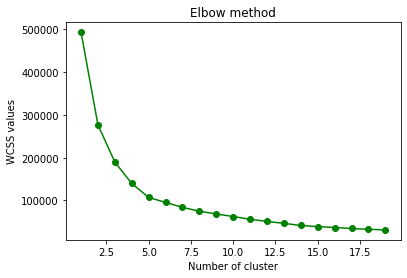

In [23]:
plt.plot(range(1,20), WCSS,"og-")
plt.title("Elbow method")
plt.xlabel("Number of cluster")
plt.ylabel("WCSS values")
plt.show()

**We See that by examine the elbow method, that the value of errors decrease slowly after k = 5**
- at this assumption we choose K = 5 as numbers of clusters

In [30]:
kmean = KMeans(n_clusters = 5, random_state = 40)
y_pred = kmean.fit_predict(X)

In [31]:
pd.DataFrame(X[y_pred]).head()

,0,1,2,3
0,16.6,28.0,6.55,48.6
1,119.0,62.3,2.85,42.9
2,119.0,62.3,2.85,42.9
3,27.3,38.4,4.17,31.4
4,90.2,10.0,7.58,44.9


## Plot each cluster KMeans had been clustered

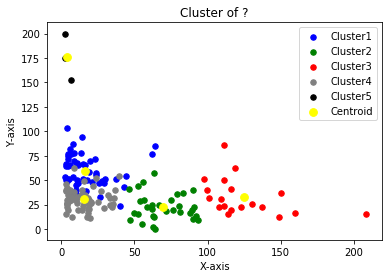

In [32]:
plt.scatter(X[y_pred== 0, 0], X[y_pred ==0,1],s=30, c="blue", label="Cluster1")
plt.scatter(X[y_pred== 1, 0], X[y_pred ==1,1],s=30, c="green", label="Cluster2")
plt.scatter(X[y_pred== 2, 0], X[y_pred ==2,1],s=30, c="red", label="Cluster3")
plt.scatter(X[y_pred== 3, 0], X[y_pred ==3,1],s=30, c="gray", label="Cluster4")
plt.scatter(X[y_pred== 4, 0], X[y_pred ==4,1],s=30, c="black", label="Cluster5")

plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1],s=60, c ="yellow", label="Centroid")
plt.title("Cluster of ?")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.show()